<a href="https://colab.research.google.com/github/DIFACQUIM/DNMT1-Protocol/blob/main/Docking_results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Script by: Diana L. Prado-Romero & Alejandro Gómez-García <br>
Thanks to the valuable comments and code-sharing of all [DIFACQUIM](https://www.difacquim.com/) to this script, especially Edgar López-López & Hassan Villegas-Quintero.

-----


# Installation of required packages and libraries


In [1]:
#Packages
!pip install rdkit
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 34.5 MB/s eta 0:00:00


In [2]:
#Import libraries
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from tqdm.auto import tqdm
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import gmean
from scipy.stats import kstest

# Read dataset

Read the dataset from the GitHub repository and load it as data frame "df":

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/DIFACQUIM/DNMT1-Protocol/main/Docking_DNMT1_153.csv')
df

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,psa,heavy_atoms,document_chembl_id,molecule_chembl_id,Scores_Ledock,Scores_Vina,Scores_MOE
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,163.84,36,CHEMBL2046381,CHEMBL83747,-10.33,-8.252,-8.819883
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,63.00,35,CHEMBL4190398,CHEMBL4215326,-8.48,-9.769,-8.797384
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,63.00,36,CHEMBL4190398,CHEMBL4208004,-8.54,-9.143,-9.393538
3,CCc1ccc(-c2cc(NCC3CCN(C)CC3)c3cc(OC)c(OCCCN4CC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,40.0,nM,7.397940,5.68,7,1,506.69,2,63.00,37,CHEMBL4190398,CHEMBL4212905,-8.27,-8.966,-9.478824
4,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OCC...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OCC4CCNCC4)cc3n2)c1,73.0,nM,7.136677,4.70,7,2,464.61,0,71.79,34,CHEMBL4190398,CHEMBL4208010,-8.57,-9.923,-8.896811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,c1ccc(CC2=NOC3CNCC23)cc1,310000.0,nM,3.508638,1.45,5,0,261.28,0,67.97,19,CHEMBL1914404,CHEMBL1916683,-6.77,-8.461,-6.628779
149,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,O=C1c2ccccc2C(=O)N1CCc1c[nH]c2ccccc12,390000.0,nM,3.408935,2.46,3,2,334.33,0,90.47,25,CHEMBL3108732,CHEMBL1564869,-5.91,-9.021,-7.034579
150,CN1CC2ON=C(c3ccc(N)cc3)C2C1,c1ccc(C2=NOC3CNCC23)cc1,570000.0,nM,3.244125,0.93,4,1,217.27,0,50.85,16,CHEMBL1914404,CHEMBL1916680,-5.52,-7.280,-5.772222
151,COc1ccc(CC2=NOC3CN(C)CC23)cc1,c1ccc(CC2=NOC3CNCC23)cc1,1130000.0,nM,2.946922,1.55,4,0,246.31,0,34.06,18,CHEMBL1914404,CHEMBL1916684,-5.62,-6.828,-6.678404


In [4]:
df.describe()

,IC50,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,psa,heavy_atoms,Scores_Ledock,Scores_Vina,Scores_MOE
count,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,4.836487e+04,5.622498,4.588301,6.960784,1.973856,469.181895,0.947712,86.767190,34.176471,-8.511895,-9.360418,-9.066751
std,1.731739e+05,1.080681,1.658586,1.845629,1.423246,92.115133,0.872013,34.308079,6.796978,1.143715,0.940415,1.138384
min,1.860000e+01,2.795880,-2.040000,2.000000,0.000000,194.190000,0.000000,34.060000,14.000000,-11.820000,-12.313000,-11.419499
25%,4.140000e+02,4.721246,3.920000,6.000000,1.000000,441.500000,0.000000,63.000000,32.000000,-9.120000,-9.894000,-9.784839
50%,1.140000e+03,5.943095,4.940000,7.000000,1.000000,482.670000,1.000000,73.400000,35.000000,-8.720000,-9.405000,-9.319137
75%,1.900000e+04,6.383000,5.660000,8.000000,3.000000,518.700000,2.000000,109.090000,38.000000,-8.270000,-8.884000,-8.649675
max,1.600000e+06,7.730487,7.520000,12.000000,8.000000,685.830000,3.000000,218.760000,50.000000,-4.640000,-6.626000,-5.300238


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   smiles              153 non-null    object 
 1   scaffold            153 non-null    object 
 2   IC50                153 non-null    float64
 3   std_units           153 non-null    object 
 4   pIC50               153 non-null    float64
 5   alogp               153 non-null    float64
 6   hba                 153 non-null    int64  
 7   hbd                 153 non-null    int64  
 8   full_mwt            153 non-null    float64
 9   num_ro5_violations  153 non-null    int64  
 10  psa                 153 non-null    float64
 11  heavy_atoms         153 non-null    int64  
 12  document_chembl_id  153 non-null    object 
 13  molecule_chembl_id  153 non-null    object 
 14  Scores_Ledock       153 non-null    float64
 15  Scores_Vina         153 non-null    float64
 16  Scores_M

# pIC50 analysis

Label compounds with pIC50 >= 5 as "active":

In [6]:
df["Activity_Label"] = np.where(df['pIC50']>=5, 'Active', 'Inactive')
df

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,psa,heavy_atoms,document_chembl_id,molecule_chembl_id,Scores_Ledock,Scores_Vina,Scores_MOE,Activity_Label
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,163.84,36,CHEMBL2046381,CHEMBL83747,-10.33,-8.252,-8.819883,Active
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,63.00,35,CHEMBL4190398,CHEMBL4215326,-8.48,-9.769,-8.797384,Active
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,63.00,36,CHEMBL4190398,CHEMBL4208004,-8.54,-9.143,-9.393538,Active
3,CCc1ccc(-c2cc(NCC3CCN(C)CC3)c3cc(OC)c(OCCCN4CC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,40.0,nM,7.397940,5.68,7,1,506.69,2,63.00,37,CHEMBL4190398,CHEMBL4212905,-8.27,-8.966,-9.478824,Active
4,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OCC...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OCC4CCNCC4)cc3n2)c1,73.0,nM,7.136677,4.70,7,2,464.61,0,71.79,34,CHEMBL4190398,CHEMBL4208010,-8.57,-9.923,-8.896811,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,c1ccc(CC2=NOC3CNCC23)cc1,310000.0,nM,3.508638,1.45,5,0,261.28,0,67.97,19,CHEMBL1914404,CHEMBL1916683,-6.77,-8.461,-6.628779,Inactive
149,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,O=C1c2ccccc2C(=O)N1CCc1c[nH]c2ccccc12,390000.0,nM,3.408935,2.46,3,2,334.33,0,90.47,25,CHEMBL3108732,CHEMBL1564869,-5.91,-9.021,-7.034579,Inactive
150,CN1CC2ON=C(c3ccc(N)cc3)C2C1,c1ccc(C2=NOC3CNCC23)cc1,570000.0,nM,3.244125,0.93,4,1,217.27,0,50.85,16,CHEMBL1914404,CHEMBL1916680,-5.52,-7.280,-5.772222,Inactive
151,COc1ccc(CC2=NOC3CN(C)CC23)cc1,c1ccc(CC2=NOC3CNCC23)cc1,1130000.0,nM,2.946922,1.55,4,0,246.31,0,34.06,18,CHEMBL1914404,CHEMBL1916684,-5.62,-6.828,-6.678404,Inactive


Group data by activity label:

In [13]:
df.groupby('Activity_Label').describe()['pIC50']

,count,mean,std,min,25%,50%,75%,max
Activity_Label,,,,,,,,
Active,110.0,6.208379,0.536619,5.045757,5.853906,6.208660,6.580892,7.730487
Inactive,43.0,4.123732,0.529596,2.795880,3.760702,4.167491,4.534017,4.950007


Distribution graphs:

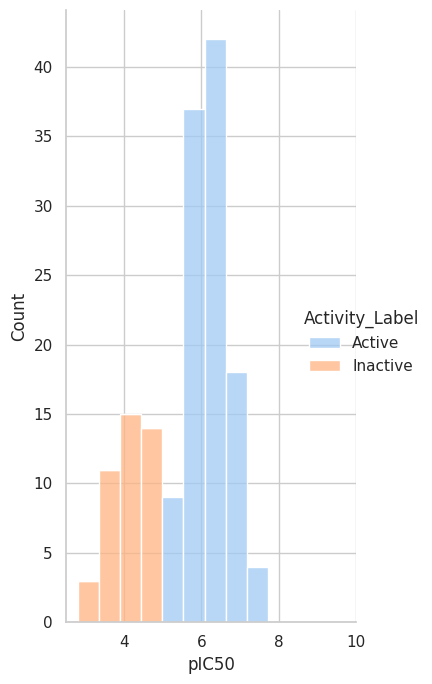

In [14]:
sol_hist = sns.displot(x='pIC50', hue='Activity_Label',
           palette='pastel', height=7, data=df, multiple="stack")

sol_hist.fig.set_figwidth(4)
plt.xlim(2.5, 10)
plt.show()

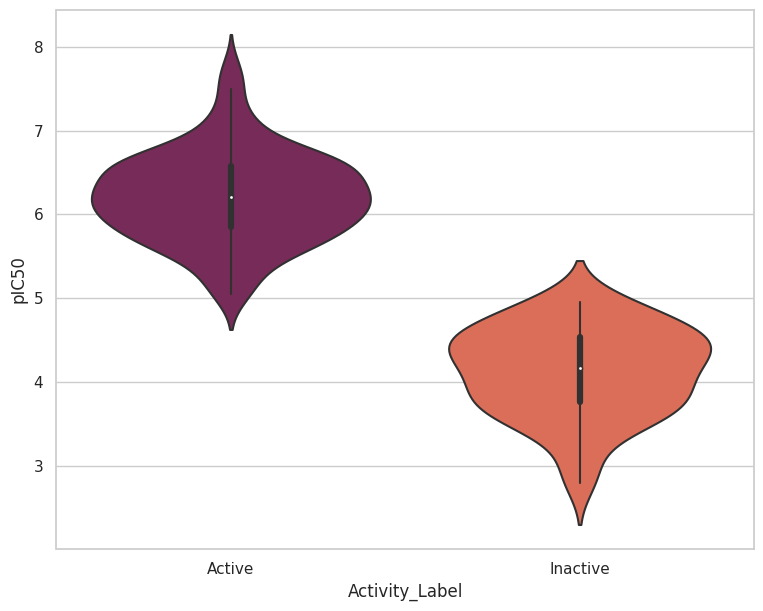

In [15]:
plt.figure(figsize=(9,7))

mw_boxplot = sns.violinplot(x='Activity_Label', y='pIC50',
             palette='rocket',
             data=df)
plt.show()

# Visualization and analysis of docking results

LeDock scores vs. Vina scores:

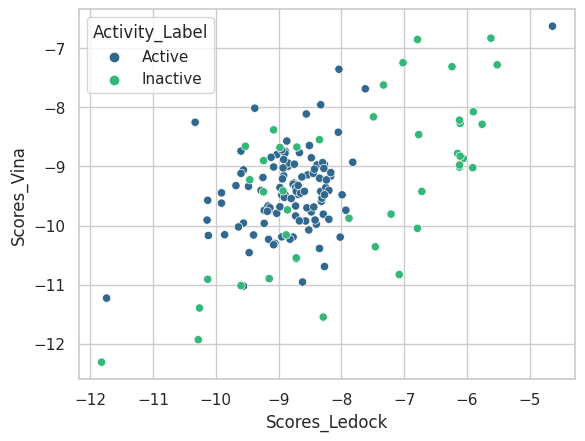

In [16]:
sns.scatterplot(data=df, x='Scores_Ledock', y='Scores_Vina', hue='Activity_Label', palette='viridis')
plt.show()

LeDock scores vs. MOE scores:

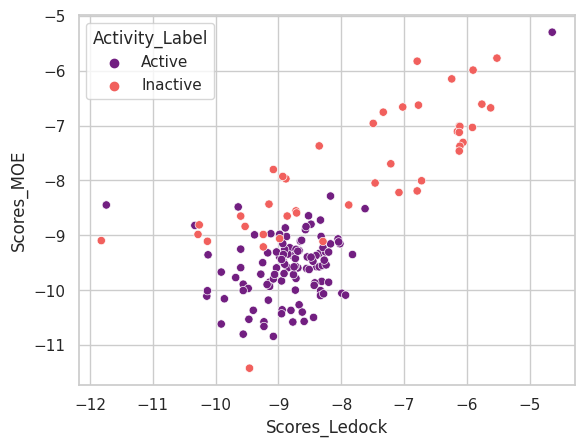

In [17]:
sns.scatterplot(data=df, x='Scores_Ledock', y='Scores_MOE', hue='Activity_Label', palette='magma')
plt.show()

MOE scores vs. Vina scores:

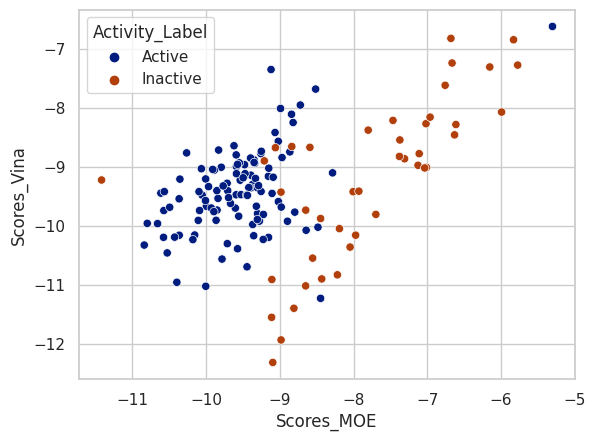

In [18]:
#Scores MOE y primer score Vina
sns.scatterplot(data=df, x='Scores_MOE', y='Scores_Vina', hue='Activity_Label', palette='dark')
plt.show()

##Scatter plots with pIC50 and pIC50 ranking





pIC50 vs. Vina scores:

[Text(0, 0.5, 'AutoDock Vina scores')]

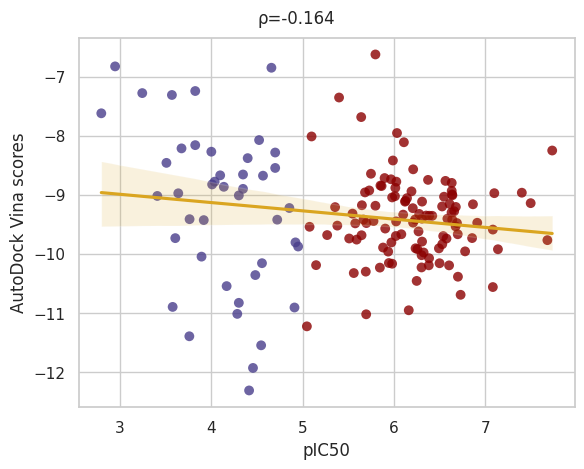

In [19]:
#Create a new column to color data points based on the activity label:
df['color'] = np.where(df['Activity_Label']=='Active', "darkred", "darkslateblue")

#Compute Spearman correlation:
corr = spearmanr(df['pIC50'], df['Scores_Vina'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s'  % (corr[0])

#Scatter plot customization:
gl = sns.regplot(data=df, x='pIC50', y='Scores_Vina', scatter_kws={'facecolors': df['color'], 'linewidth':0, 's':50}, line_kws = {'color': 'goldenrod'})
gl.text(4.5, -6.1, text, fontsize=12)

gl.set(ylabel='AutoDock Vina scores')

pIC50 vs. LeDock scores:

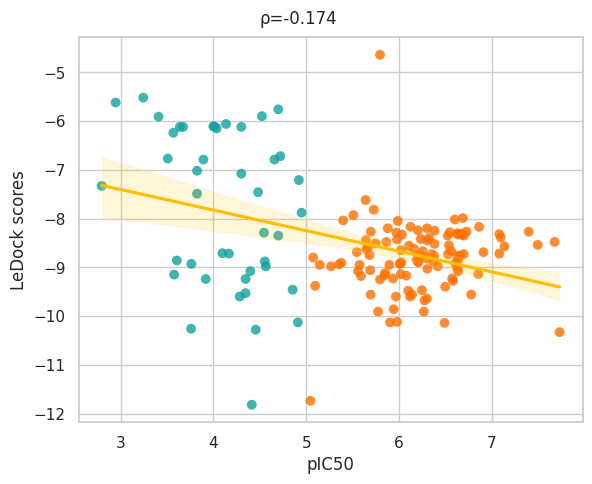

In [20]:
#Create a new column to color data points based on the activity label:
df['color_2'] = np.where(df['Activity_Label']=='Active', "#FF7000", "#10A19D")

#Compute Spearman correlation:
corr = spearmanr(df['pIC50'], df['Scores_Ledock'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

#Scatter plot customization:
gl = sns.regplot(data=df, x='pIC50', y='Scores_Ledock', scatter_kws={'facecolors': df['color_2'], 'linewidth':0, 's':50}, line_kws = {'color': '#FFBF00'})
gl.text(4.5, -4, text, fontsize=12)

gl.set(ylabel='LeDock scores')
gl.figure.set_size_inches(6.5, 5)

pIC50 vs. MOE scores:

[Text(0, 0.5, 'MOE scores')]

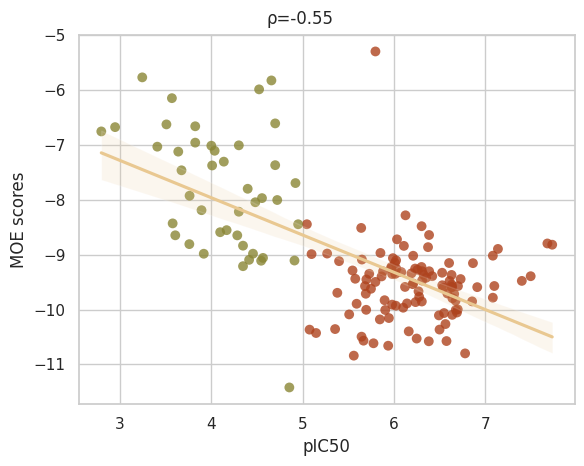

In [21]:
df['color_3'] = np.where(df['Activity_Label']=='Active', "#AE431E", "#8A8635")

corr = spearmanr(df['pIC50'], df['Scores_MOE'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='pIC50', y='Scores_MOE', scatter_kws={'facecolors': df['color_3'], 'linewidth':0, 's':50}, line_kws = {'color': '#E9C891'})
gl.text(4.6, -4.8, text, fontsize=12)

gl.set(ylabel='MOE scores')

##Analysis of docking scores grouped by activity label:

In [22]:
#Vina scores
df.groupby('Activity_Label').describe()['Scores_Vina']

,count,mean,std,min,25%,50%,75%,max
Activity_Label,,,,,,,,
Active,110.0,-9.412255,0.711922,-11.228,-9.8305,-9.4215,-9.02725,-6.626
Inactive,43.0,-9.227814,1.363899,-12.313,-10.1035,-8.9760,-8.33350,-6.828


In [23]:
#LeDock scores
df.groupby('Activity_Label').describe()['Scores_Ledock']

,count,mean,std,min,25%,50%,75%,max
Activity_Label,,,,,,,,
Active,110.0,-8.804818,0.728846,-11.74,-9.135,-8.755,-8.3925,-4.64
Inactive,43.0,-7.762558,1.598683,-11.82,-9.030,-7.460,-6.1350,-5.52


In [24]:
#MOE scores
df.groupby('Activity_Label').describe()['Scores_MOE']

,count,mean,std,min,25%,50%,75%,max
Activity_Label,,,,,,,,
Active,110.0,-9.550479,0.678644,-10.840324,-9.925729,-9.543780,-9.255155,-5.300238
Inactive,43.0,-7.829307,1.146370,-11.419499,-8.649088,-7.927531,-7.013302,-5.772222


##pIC50 and scores' ranking:

Calculate rankings:

In [25]:
df["Rank_pIC50"] = df['pIC50'].rank(method='min', ascending=False)
df["Rank_ledock"] = df['Scores_Ledock'].rank(method='min')
df["Rank_moe"] = df['Scores_MOE'].rank(method='min')
df["Rank_vina"] = df['Scores_Vina'].rank(method='min')
df

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Scores_Vina,Scores_MOE,Activity_Label,color,color_2,color_3,Rank_pIC50,Rank_ledock,Rank_moe,Rank_vina
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,-8.252,-8.819883,Active,darkred,#FF7000,#AE431E,1.0,3.0,111.0,138.0
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,-9.769,-8.797384,Active,darkred,#FF7000,#AE431E,2.0,93.0,113.0,45.0
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,-9.143,-9.393538,Active,darkred,#FF7000,#AE431E,3.0,90.0,68.0,95.0
3,CCc1ccc(-c2cc(NCC3CCN(C)CC3)c3cc(OC)c(OCCCN4CC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,40.0,nM,7.397940,5.68,7,1,506.69,2,...,-8.966,-9.478824,Active,darkred,#FF7000,#AE431E,4.0,113.0,61.0,109.0
4,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OCC...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OCC4CCNCC4)cc3n2)c1,73.0,nM,7.136677,4.70,7,2,464.61,0,...,-9.923,-8.896811,Active,darkred,#FF7000,#AE431E,5.0,87.0,107.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,c1ccc(CC2=NOC3CNCC23)cc1,310000.0,nM,3.508638,1.45,5,0,261.28,0,...,-8.461,-6.628779,Inactive,darkslateblue,#10A19D,#8A8635,149.0,138.0,147.0,133.0
149,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,O=C1c2ccccc2C(=O)N1CCc1c[nH]c2ccccc12,390000.0,nM,3.408935,2.46,3,2,334.33,0,...,-9.021,-7.034579,Inactive,darkslateblue,#10A19D,#8A8635,150.0,148.0,140.0,103.0
150,CN1CC2ON=C(c3ccc(N)cc3)C2C1,c1ccc(C2=NOC3CNCC23)cc1,570000.0,nM,3.244125,0.93,4,1,217.27,0,...,-7.280,-5.772222,Inactive,darkslateblue,#10A19D,#8A8635,151.0,152.0,152.0,149.0
151,COc1ccc(CC2=NOC3CN(C)CC23)cc1,c1ccc(CC2=NOC3CNCC23)cc1,1130000.0,nM,2.946922,1.55,4,0,246.31,0,...,-6.828,-6.678404,Inactive,darkslateblue,#10A19D,#8A8635,152.0,151.0,145.0,152.0


pIC50 vs. Vina ranking:

[Text(0, 0.5, 'AutoDock Vina ranking')]

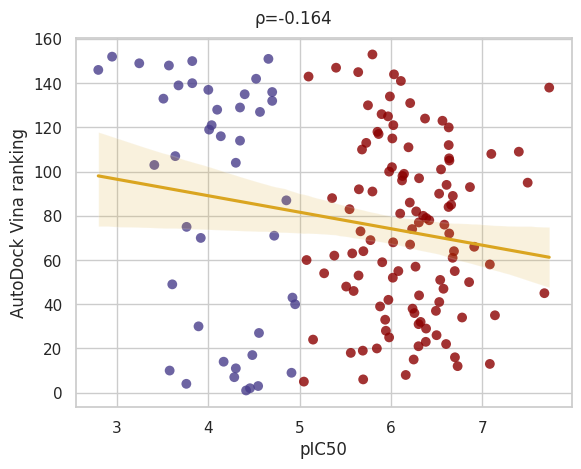

In [26]:
corr = spearmanr(df['pIC50'], df['Rank_vina'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s'  % (corr[0])

gl = sns.regplot(data=df, x='pIC50', y='Rank_vina', scatter_kws={'facecolors': df['color'], 'linewidth':0, 's':50}, line_kws = {'color': 'goldenrod'})
gl.text(4.5, 167, text, fontsize=12)

gl.set(ylabel='AutoDock Vina ranking')

pIC50 vs. LeDock ranking:

[Text(0.5, 0, 'pIC50'), Text(0, 0.5, 'LeDock ranking')]

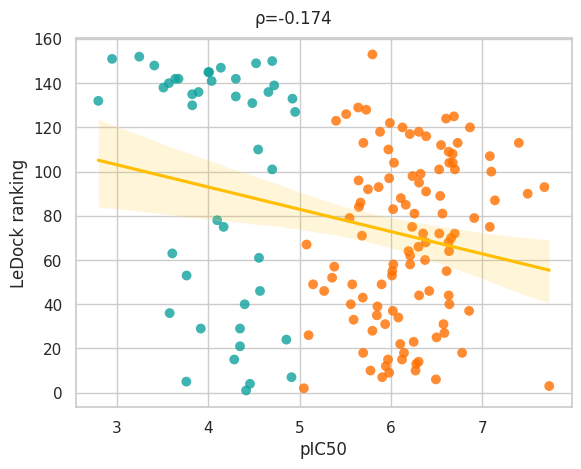

In [27]:
corr = spearmanr(df['pIC50'], df['Rank_ledock'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='pIC50', y='Rank_ledock', scatter_kws={'facecolors': df['color_2'], 'linewidth':0, 's':50}, line_kws = {'color': '#FFBF00'})
gl.text(4.5, 167, text, fontsize=12)

gl.set(xlabel='pIC50', ylabel='LeDock ranking')

pIC50 vs. MOE ranking:

[Text(0, 0.5, 'MOE ranking')]

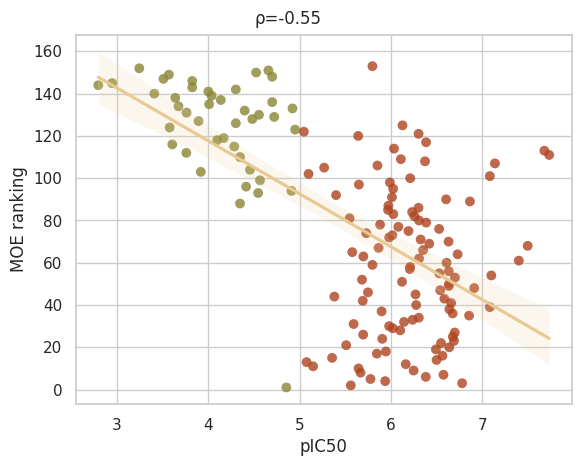

In [28]:
corr = spearmanr(df['pIC50'], df['Rank_moe'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='pIC50', y='Rank_moe', scatter_kws={'facecolors': df['color_3'], 'linewidth':0, 's':50}, line_kws = {'color': '#E9C891'})
gl.text(4.5, 173, text, fontsize=12)

gl.set(ylabel='MOE ranking')

pIC50 ranking vs. Vina ranking:

[Text(0.5, 0, 'pIC50 ranking'), Text(0, 0.5, 'AutoDock Vina ranking')]

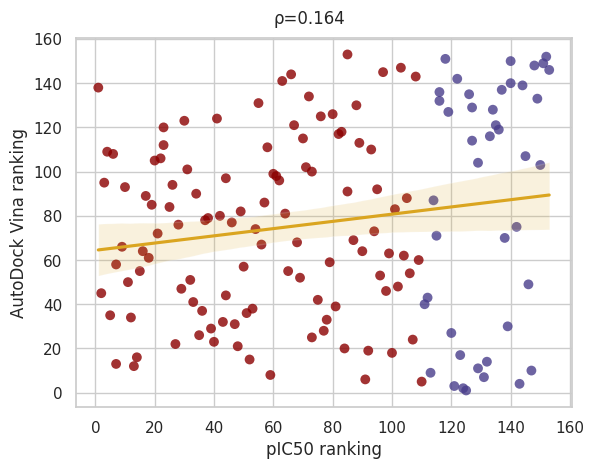

In [29]:
corr = spearmanr(df['Rank_pIC50'], df['Rank_vina'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='Rank_vina', scatter_kws={'facecolors': df['color'], 'linewidth':0, 's':50}, line_kws = {'color': 'goldenrod'})
gl.text(60, 167, text, fontsize=12)

gl.set(xlabel='pIC50 ranking', ylabel='AutoDock Vina ranking')

pIC50 ranking vs. LeDock ranking:

[Text(0.5, 0, 'pIC50 ranking'), Text(0, 0.5, 'LeDock ranking')]

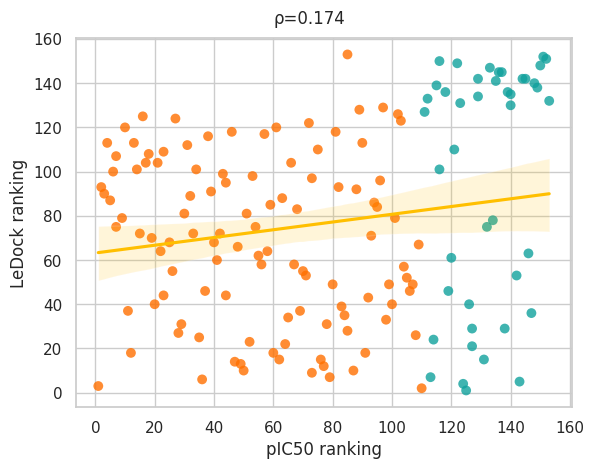

In [30]:
corr = spearmanr(df['Rank_pIC50'], df['Rank_ledock'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='Rank_ledock', scatter_kws={'facecolors': df['color_2'], 'linewidth':0, 's':50}, line_kws = {'color': '#FFBF00'})
gl.text(60, 167, text, fontsize=12)

gl.set(xlabel='pIC50 ranking', ylabel='LeDock ranking')

pIC50 ranking vs. MOE ranking:

[Text(0.5, 0, 'pIC50 ranking'), Text(0, 0.5, 'MOE ranking')]

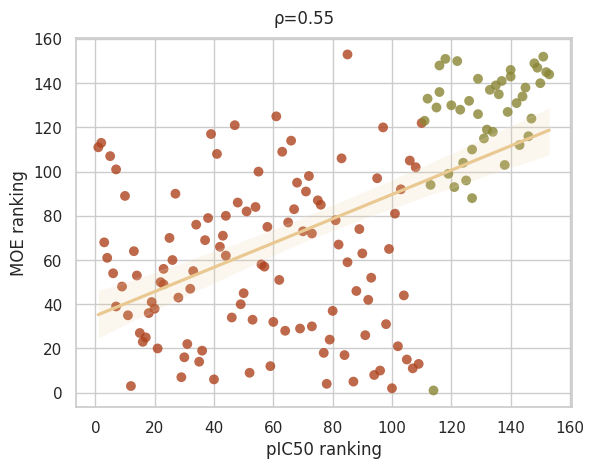

In [31]:
corr = spearmanr(df['Rank_pIC50'], df['Rank_moe'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='Rank_moe', scatter_kws={'facecolors': df['color_3'], 'linewidth':0, 's':50}, line_kws = {'color': '#E9C891'})
gl.text(60, 167, text, fontsize=12)

gl.set(xlabel='pIC50 ranking', ylabel='MOE ranking')

pIC50 ranking vs. Vina scores:

[Text(0.5, 0, 'pIC50 ranking'), Text(0, 0.5, 'AutoDock Vina scores')]

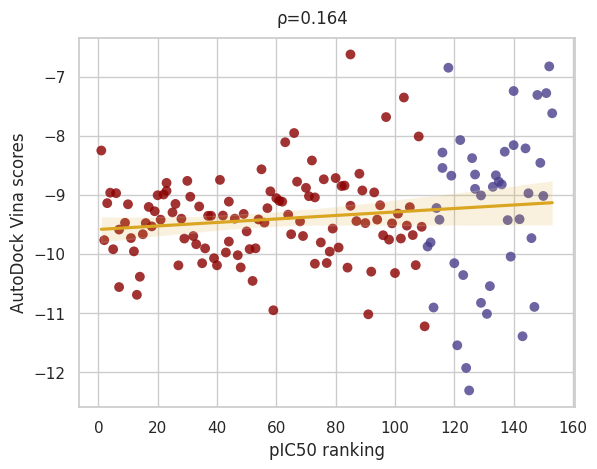

In [32]:
corr = spearmanr(df['Rank_pIC50'], df['Scores_Vina'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='Scores_Vina', scatter_kws={'facecolors': df['color'], 'linewidth':0, 's':50}, line_kws = {'color': 'goldenrod'})
gl.text(60, -6.1, text, fontsize=12)

gl.set(xlabel='pIC50 ranking', ylabel='AutoDock Vina scores')

pIC50 ranking vs. LeDock scores:

[Text(0.5, 0, 'pIC50 ranking'), Text(0, 0.5, 'LeDock scores')]

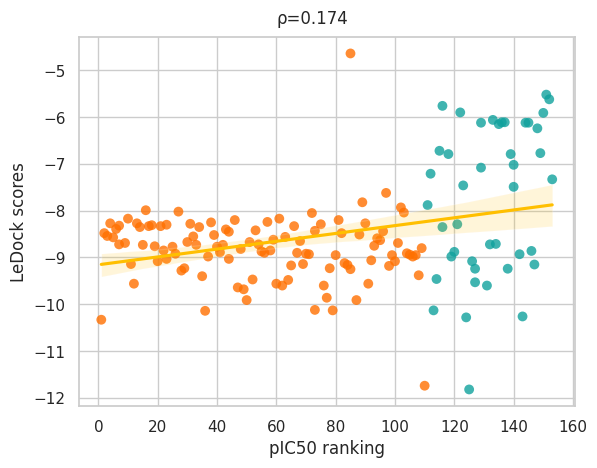

In [33]:
corr = spearmanr(df['Rank_pIC50'], df['Scores_Ledock'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='Scores_Ledock', scatter_kws={'facecolors': df['color_2'], 'linewidth':0, 's':50}, line_kws = {'color': '#FFBF00'})
gl.text(60, -4, text, fontsize=12)

gl.set(xlabel='pIC50 ranking', ylabel='LeDock scores')

pIC50 ranking vs. MOE scores:

[Text(0.5, 0, 'pIC50 ranking'), Text(0, 0.5, 'MOE scores')]

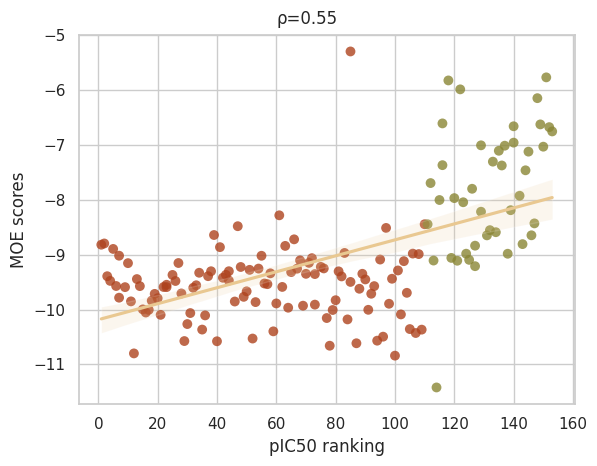

In [ ]:
corr = spearmanr(df['Rank_pIC50'], df['Scores_MOE'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='Scores_MOE', scatter_kws={'facecolors': df['color_3'], 'linewidth':0, 's':50}, line_kws = {'color': '#E9C891'})
gl.text(60, -4.8, text, fontsize=12)

gl.set(xlabel='pIC50 ranking', ylabel='MOE scores')

##Ligand efficiency

Create new columns with the RDKit molecular object and Heavy Atom Count:

In [34]:
tqdm.pandas()
df['mol'] = df.smiles.progress_apply(Chem.MolFromSmiles)
df['Heavy_atom_count'] = df.mol.progress_apply(Descriptors.HeavyAtomCount)
df

  0%|          | 0/153 [00:00<?, ?it/s]

  0%|          | 0/153 [00:00<?, ?it/s]

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Activity_Label,color,color_2,color_3,Rank_pIC50,Rank_ledock,Rank_moe,Rank_vina,mol,Heavy_atom_count
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,Active,darkred,#FF7000,#AE431E,1.0,3.0,111.0,138.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d5b0>,36
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,Active,darkred,#FF7000,#AE431E,2.0,93.0,113.0,45.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d620>,35
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,Active,darkred,#FF7000,#AE431E,3.0,90.0,68.0,95.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d690>,36
3,CCc1ccc(-c2cc(NCC3CCN(C)CC3)c3cc(OC)c(OCCCN4CC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,40.0,nM,7.397940,5.68,7,1,506.69,2,...,Active,darkred,#FF7000,#AE431E,4.0,113.0,61.0,109.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d700>,37
4,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OCC...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OCC4CCNCC4)cc3n2)c1,73.0,nM,7.136677,4.70,7,2,464.61,0,...,Active,darkred,#FF7000,#AE431E,5.0,87.0,107.0,35.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d770>,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,c1ccc(CC2=NOC3CNCC23)cc1,310000.0,nM,3.508638,1.45,5,0,261.28,0,...,Inactive,darkslateblue,#10A19D,#8A8635,149.0,138.0,147.0,133.0,<rdkit.Chem.rdchem.Mol object at 0x78732c98d700>,19
149,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,O=C1c2ccccc2C(=O)N1CCc1c[nH]c2ccccc12,390000.0,nM,3.408935,2.46,3,2,334.33,0,...,Inactive,darkslateblue,#10A19D,#8A8635,150.0,148.0,140.0,103.0,<rdkit.Chem.rdchem.Mol object at 0x78732c98d770>,25
150,CN1CC2ON=C(c3ccc(N)cc3)C2C1,c1ccc(C2=NOC3CNCC23)cc1,570000.0,nM,3.244125,0.93,4,1,217.27,0,...,Inactive,darkslateblue,#10A19D,#8A8635,151.0,152.0,152.0,149.0,<rdkit.Chem.rdchem.Mol object at 0x78732c98d7e0>,16
151,COc1ccc(CC2=NOC3CN(C)CC23)cc1,c1ccc(CC2=NOC3CNCC23)cc1,1130000.0,nM,2.946922,1.55,4,0,246.31,0,...,Inactive,darkslateblue,#10A19D,#8A8635,152.0,151.0,145.0,152.0,<rdkit.Chem.rdchem.Mol object at 0x78732c98d850>,18


Calculate Ligand efficiency (LE) for each software:

In [35]:
df['LE_MOE'] = df['Scores_MOE'] / df['Heavy_atom_count']
df['LE_ledock'] = df['Scores_Ledock'] / df['Heavy_atom_count']
df['LE_vina'] = df['Scores_Vina'] / df['Heavy_atom_count']
df

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,color_3,Rank_pIC50,Rank_ledock,Rank_moe,Rank_vina,mol,Heavy_atom_count,LE_MOE,LE_ledock,LE_vina
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,#AE431E,1.0,3.0,111.0,138.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d5b0>,36,-0.244997,-0.286944,-0.229222
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,#AE431E,2.0,93.0,113.0,45.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d620>,35,-0.251354,-0.242286,-0.279114
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,#AE431E,3.0,90.0,68.0,95.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d690>,36,-0.260932,-0.237222,-0.253972
3,CCc1ccc(-c2cc(NCC3CCN(C)CC3)c3cc(OC)c(OCCCN4CC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,40.0,nM,7.397940,5.68,7,1,506.69,2,...,#AE431E,4.0,113.0,61.0,109.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d700>,37,-0.256184,-0.223514,-0.242324
4,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OCC...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OCC4CCNCC4)cc3n2)c1,73.0,nM,7.136677,4.70,7,2,464.61,0,...,#AE431E,5.0,87.0,107.0,35.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d770>,34,-0.261671,-0.252059,-0.291853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,CN1CC2ON=C(Cc3ccc([N+](=O)[O-])cc3)C2C1,c1ccc(CC2=NOC3CNCC23)cc1,310000.0,nM,3.508638,1.45,5,0,261.28,0,...,#8A8635,149.0,138.0,147.0,133.0,<rdkit.Chem.rdchem.Mol object at 0x78732c98d700>,19,-0.348883,-0.356316,-0.445316
149,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,O=C1c2ccccc2C(=O)N1CCc1c[nH]c2ccccc12,390000.0,nM,3.408935,2.46,3,2,334.33,0,...,#8A8635,150.0,148.0,140.0,103.0,<rdkit.Chem.rdchem.Mol object at 0x78732c98d770>,25,-0.281383,-0.236400,-0.360840
150,CN1CC2ON=C(c3ccc(N)cc3)C2C1,c1ccc(C2=NOC3CNCC23)cc1,570000.0,nM,3.244125,0.93,4,1,217.27,0,...,#8A8635,151.0,152.0,152.0,149.0,<rdkit.Chem.rdchem.Mol object at 0x78732c98d7e0>,16,-0.360764,-0.345000,-0.455000
151,COc1ccc(CC2=NOC3CN(C)CC23)cc1,c1ccc(CC2=NOC3CNCC23)cc1,1130000.0,nM,2.946922,1.55,4,0,246.31,0,...,#8A8635,152.0,151.0,145.0,152.0,<rdkit.Chem.rdchem.Mol object at 0x78732c98d850>,18,-0.371022,-0.312222,-0.379333


##Scatter plots of Ligand efficiency:

pIC50 ranking vs. Vina LE:

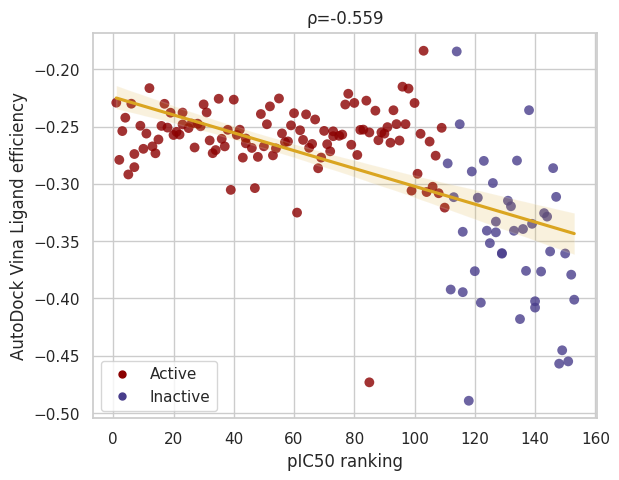

In [36]:
corr = spearmanr(df['Rank_pIC50'], df['LE_vina'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='LE_vina', scatter_kws={'facecolors': df['color'], 'linewidth':0, 's':50}, line_kws = {'color': 'goldenrod'})
gl.text(64, -0.16, text, fontsize=12)

gl.set(ylabel='AutoDock Vina Ligand efficiency')
gl.set(xlabel='pIC50 ranking')

custom = [Line2D([], [], marker='.', markersize=10, color='darkred', linestyle='None'),
          Line2D([], [], marker='.', markersize=10, color='darkslateblue', linestyle='None')]
plt.legend(custom, ['Active', 'Inactive'], loc='lower left')
gl.figure.set_size_inches(6.5, 5)

pIC50 ranking vs. LeDock LE:

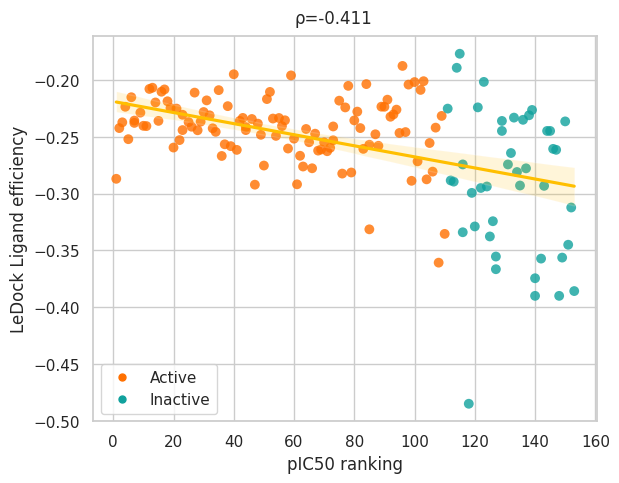

In [37]:
corr = spearmanr(df['Rank_pIC50'], df['LE_ledock'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='LE_ledock', scatter_kws={'facecolors': df['color_2'], 'linewidth':0, 's':50}, line_kws = {'color': '#FFBF00'})
gl.text(60, -0.15, text, fontsize=12)

gl.set(ylabel='LeDock Ligand efficiency')
gl.set(xlabel='pIC50 ranking')

custom = [Line2D([], [], marker='.', markersize=10, color='#FF7000', linestyle='None'),
          Line2D([], [], marker='.', markersize=10, color='#10A19D', linestyle='None')]
plt.legend(custom, ['Active', 'Inactive'], loc='lower left')
gl.figure.set_size_inches(6.5, 5)

pIC50 ranking vs. MOE LE:

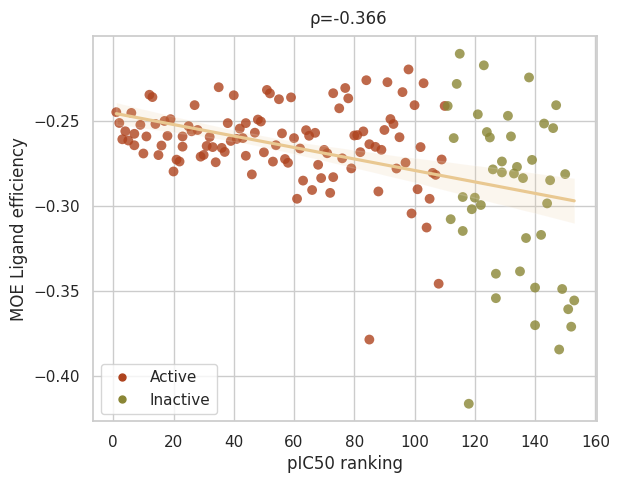

In [38]:
corr = spearmanr(df['Rank_pIC50'], df['LE_MOE'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='LE_MOE', scatter_kws={'facecolors': df['color_3'], 'linewidth':0, 's':50}, line_kws = {'color': '#E9C891'})
gl.text(65, -0.193, text, fontsize=12)

gl.set(ylabel='MOE Ligand efficiency')
gl.set(xlabel='pIC50 ranking')

custom = [Line2D([], [], marker='.', markersize=10, color='#AE431E', linestyle='None'),
          Line2D([], [], marker='.', markersize=10, color='#8A8635', linestyle='None')]
plt.legend(custom, ['Active', 'Inactive'], loc='lower left')
gl.figure.set_size_inches(6.5, 5)

pIC50 vs. Vina LE:

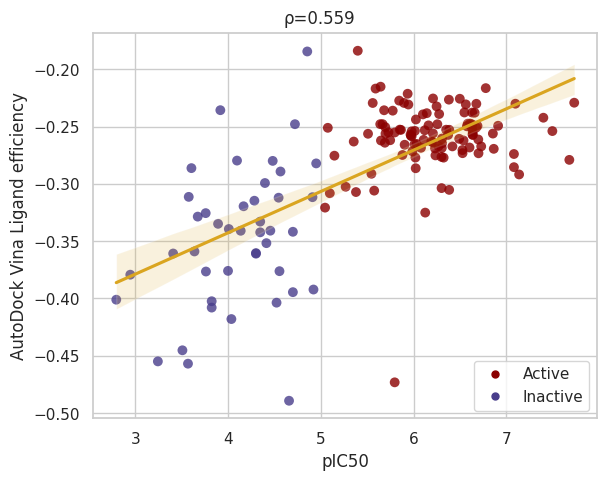

In [39]:
corr = spearmanr(df['pIC50'], df['LE_vina'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='pIC50', y='LE_vina', scatter_kws={'facecolors': df['color'], 'linewidth':0, 's':50}, line_kws = {'color': 'goldenrod'})
gl.text(4.6, -0.16, text, fontsize=12)

gl.set(ylabel='AutoDock Vina Ligand efficiency')

custom = [Line2D([], [], marker='.', markersize=10, color='darkred', linestyle='None'),
          Line2D([], [], marker='.', markersize=10, color='darkslateblue', linestyle='None')]
plt.legend(custom, ['Active', 'Inactive'], loc='lower right')
gl.figure.set_size_inches(6.5, 5)

pIC50 vs. LeDock LE:

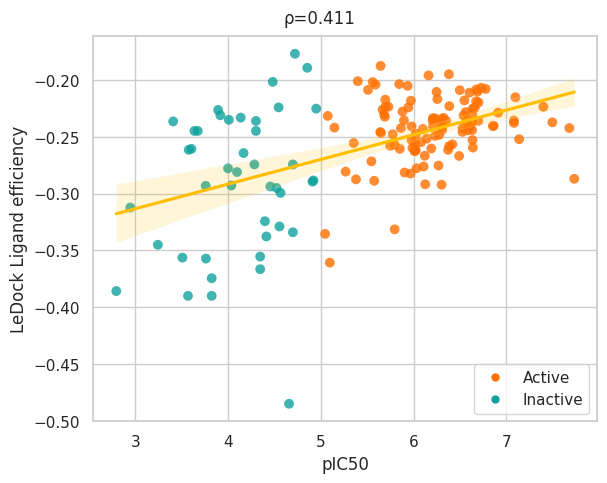

In [40]:
corr = spearmanr(df['pIC50'], df['LE_ledock'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='pIC50', y='LE_ledock', scatter_kws={'facecolors': df['color_2'], 'linewidth':0, 's':50}, line_kws = {'color': '#FFBF00'})
gl.text(4.6, -0.15, text, fontsize=12)

gl.set(ylabel='LeDock Ligand efficiency')

custom = [Line2D([], [], marker='.', markersize=10, color='#FF7000', linestyle='None'),
          Line2D([], [], marker='.', markersize=10, color='#10A19D', linestyle='None')]
plt.legend(custom, ['Active', 'Inactive'], loc='lower right')
gl.figure.set_size_inches(6.5, 5)

#plt.savefig('/content/drive/MyDrive/Huawei/Gráficas/Ledock_LE_R.png', dpi=300)

pIC50 vs. MOE LE:

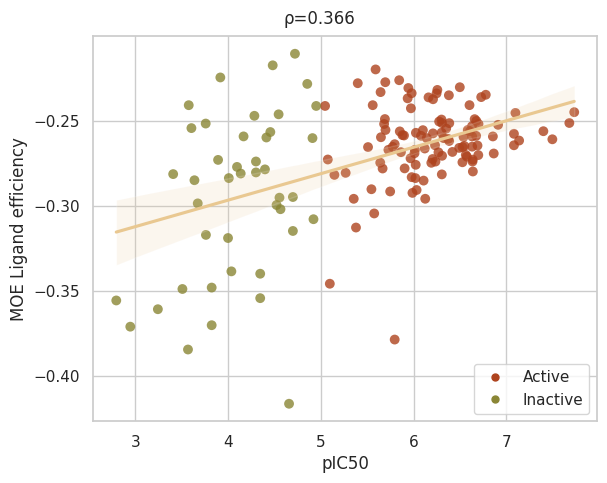

In [41]:
corr = spearmanr(df['pIC50'], df['LE_MOE'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='pIC50', y='LE_MOE', scatter_kws={'facecolors': df['color_3'], 'linewidth':0, 's':50}, line_kws = {'color': '#E9C891'})
gl.text(4.6, -0.193, text, fontsize=12)

gl.set(ylabel='MOE Ligand efficiency')

custom = [Line2D([], [], marker='.', markersize=10, color='#AE431E', linestyle='None'),
          Line2D([], [], marker='.', markersize=10, color='#8A8635', linestyle='None')]
plt.legend(custom, ['Active', 'Inactive'], loc='lower right')
gl.figure.set_size_inches(6.5, 5)

# Consensus metrics

##Minimum: best prediction

Minimum of LE:

In [42]:
df['Consensus_min'] = df[['LE_MOE','LE_ledock','LE_vina']].min(axis=1)
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Rank_pIC50,Rank_ledock,Rank_moe,Rank_vina,mol,Heavy_atom_count,LE_MOE,LE_ledock,LE_vina,Consensus_min
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,1.0,3.0,111.0,138.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d5b0>,36,-0.244997,-0.286944,-0.229222,-0.286944
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,2.0,93.0,113.0,45.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d620>,35,-0.251354,-0.242286,-0.279114,-0.279114
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,3.0,90.0,68.0,95.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d690>,36,-0.260932,-0.237222,-0.253972,-0.260932


In [43]:
#Spearman's correlation
corr_Min = spearmanr(df['Rank_pIC50'], df['Consensus_min'])
corr_Min = [np.round(c, 3) for c in corr_Min]
corr_Min

[-0.564, 0.0]

Minimum of docking scores:

In [44]:
df['Consensus_min_scores'] = df[['Scores_MOE','Scores_Ledock','Scores_Vina']].min(axis=1)
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Rank_ledock,Rank_moe,Rank_vina,mol,Heavy_atom_count,LE_MOE,LE_ledock,LE_vina,Consensus_min,Consensus_min_scores
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,3.0,111.0,138.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d5b0>,36,-0.244997,-0.286944,-0.229222,-0.286944,-10.330000
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,93.0,113.0,45.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d620>,35,-0.251354,-0.242286,-0.279114,-0.279114,-9.769000
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,90.0,68.0,95.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d690>,36,-0.260932,-0.237222,-0.253972,-0.260932,-9.393538


In [45]:
#Spearman's correlation
corr_Min = spearmanr(df['Rank_pIC50'], df['Consensus_min_scores'])
corr_Min = [np.round(c, 3) for c in corr_Min]
corr_Min

[0.23, 0.004]

##Maximum: worst prediction



Maximum of LE:

In [46]:
df['Consensus_max'] = df[['LE_MOE','LE_ledock','LE_vina']].max(axis=1)
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Rank_moe,Rank_vina,mol,Heavy_atom_count,LE_MOE,LE_ledock,LE_vina,Consensus_min,Consensus_min_scores,Consensus_max
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,111.0,138.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d5b0>,36,-0.244997,-0.286944,-0.229222,-0.286944,-10.330000,-0.229222
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,113.0,45.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d620>,35,-0.251354,-0.242286,-0.279114,-0.279114,-9.769000,-0.242286
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,68.0,95.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d690>,36,-0.260932,-0.237222,-0.253972,-0.260932,-9.393538,-0.237222


In [47]:
#Spearman's correlation
corr_Max = spearmanr(df['Rank_pIC50'], df['Consensus_max'])
corr_Max = [np.round(c, 3) for c in corr_Max]
corr_Max

[-0.391, 0.0]

Maximum of scores:

In [48]:
df['Consensus_max_scores'] = df[['Scores_MOE','Scores_Ledock','Scores_Vina']].max(axis=1)
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Rank_vina,mol,Heavy_atom_count,LE_MOE,LE_ledock,LE_vina,Consensus_min,Consensus_min_scores,Consensus_max,Consensus_max_scores
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,138.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d5b0>,36,-0.244997,-0.286944,-0.229222,-0.286944,-10.330000,-0.229222,-8.252
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,45.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d620>,35,-0.251354,-0.242286,-0.279114,-0.279114,-9.769000,-0.242286,-8.480
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,95.0,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d690>,36,-0.260932,-0.237222,-0.253972,-0.260932,-9.393538,-0.237222,-8.540


In [49]:
#Spearman's correlation
corr_Max = spearmanr(df['Rank_pIC50'], df['Consensus_max_scores'])
corr_Max = [np.round(c, 3) for c in corr_Max]
corr_Max

[0.33, 0.0]

##Arithmetic mean

Mean of LE:

In [50]:
df['Consensus_mean'] = df[['LE_MOE','LE_ledock','LE_vina']].mean(axis=1)
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,mol,Heavy_atom_count,LE_MOE,LE_ledock,LE_vina,Consensus_min,Consensus_min_scores,Consensus_max,Consensus_max_scores,Consensus_mean
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d5b0>,36,-0.244997,-0.286944,-0.229222,-0.286944,-10.330000,-0.229222,-8.252,-0.253721
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d620>,35,-0.251354,-0.242286,-0.279114,-0.279114,-9.769000,-0.242286,-8.480,-0.257585
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,<rdkit.Chem.rdchem.Mol object at 0x78732aa8d690>,36,-0.260932,-0.237222,-0.253972,-0.260932,-9.393538,-0.237222,-8.540,-0.250709


In [51]:
#Spearman´s correlation
corr_Mean = spearmanr(df['Rank_pIC50'], df['Consensus_mean'])
corr_Mean = [np.round(c, 3) for c in corr_Mean]
corr_Mean

[-0.541, 0.0]

Mean of scores:

In [52]:
df['Consensus_mean_scores'] = df[['Scores_MOE','Scores_Ledock','Scores_Vina']].mean(axis=1)
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Heavy_atom_count,LE_MOE,LE_ledock,LE_vina,Consensus_min,Consensus_min_scores,Consensus_max,Consensus_max_scores,Consensus_mean,Consensus_mean_scores
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,36,-0.244997,-0.286944,-0.229222,-0.286944,-10.330000,-0.229222,-8.252,-0.253721,-9.133961
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,35,-0.251354,-0.242286,-0.279114,-0.279114,-9.769000,-0.242286,-8.480,-0.257585,-9.015461
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,36,-0.260932,-0.237222,-0.253972,-0.260932,-9.393538,-0.237222,-8.540,-0.250709,-9.025512


In [53]:
#Spearman´s correlation
corr_Mean = spearmanr(df['Rank_pIC50'], df['Consensus_mean_scores'])
corr_Mean = [np.round(c, 3) for c in corr_Mean]
corr_Mean

[0.321, 0.0]

##Median

Median of LE:

In [54]:
df['Consensus_median'] = df[['LE_MOE','LE_ledock','LE_vina']].median(axis=1)
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,LE_MOE,LE_ledock,LE_vina,Consensus_min,Consensus_min_scores,Consensus_max,Consensus_max_scores,Consensus_mean,Consensus_mean_scores,Consensus_median
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,-0.244997,-0.286944,-0.229222,-0.286944,-10.330000,-0.229222,-8.252,-0.253721,-9.133961,-0.244997
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,-0.251354,-0.242286,-0.279114,-0.279114,-9.769000,-0.242286,-8.480,-0.257585,-9.015461,-0.251354
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,-0.260932,-0.237222,-0.253972,-0.260932,-9.393538,-0.237222,-8.540,-0.250709,-9.025512,-0.253972


In [55]:
#Spearman´s correlation
corr_Median = spearmanr(df['Rank_pIC50'], df['Consensus_median'])
corr_Median = [np.round(c, 3) for c in corr_Median]
corr_Median

[-0.498, 0.0]

Median of scores:

In [56]:
df['Consensus_median_scores'] = df[['Scores_MOE','Scores_Ledock','Scores_Vina']].median(axis=1)
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,LE_ledock,LE_vina,Consensus_min,Consensus_min_scores,Consensus_max,Consensus_max_scores,Consensus_mean,Consensus_mean_scores,Consensus_median,Consensus_median_scores
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,-0.286944,-0.229222,-0.286944,-10.330000,-0.229222,-8.252,-0.253721,-9.133961,-0.244997,-8.819883
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,-0.242286,-0.279114,-0.279114,-9.769000,-0.242286,-8.480,-0.257585,-9.015461,-0.251354,-8.797384
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,-0.237222,-0.253972,-0.260932,-9.393538,-0.237222,-8.540,-0.250709,-9.025512,-0.253972,-9.143000


In [57]:
#Spearman´s correlation
corr_Median = spearmanr(df['Rank_pIC50'], df['Consensus_median_scores'])
corr_Median = [np.round(c, 3) for c in corr_Median]
corr_Median

[0.372, 0.0]

##Geometric mean

Create columns with positive scores and LE:

In [58]:
#Geometric mean and Euclidean norm cannot be calculated with negative numbers because of the involved square root,
#a multiplication by -1 is done after the calculation to recover the negative number.
#Harmonic mean is also defined for positive numbers.

df['scores_moe_positive']=df['Scores_MOE'].multiply(-1)
df['scores_ledock_positive']=df['Scores_Ledock'].multiply(-1)
df['scores_vina_positive']=df['Scores_Vina'].multiply(-1)

df['LE_moe_positive']=df['LE_MOE'].multiply(-1)
df['LE_ledock_positive']=df['LE_ledock'].multiply(-1)
df['LE_vina_positive']=df['LE_vina'].multiply(-1)

df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Consensus_mean,Consensus_mean_scores,Consensus_median,Consensus_median_scores,scores_moe_positive,scores_ledock_positive,scores_vina_positive,LE_moe_positive,LE_ledock_positive,LE_vina_positive
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,-0.253721,-9.133961,-0.244997,-8.819883,8.819883,10.33,8.252,0.244997,0.286944,0.229222
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,-0.257585,-9.015461,-0.251354,-8.797384,8.797384,8.48,9.769,0.251354,0.242286,0.279114
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,-0.250709,-9.025512,-0.253972,-9.143000,9.393538,8.54,9.143,0.260932,0.237222,0.253972


Geometric mean of LE:

In [59]:
df["Geometric_mean"]=stats.gmean(df[['LE_moe_positive','LE_ledock_positive','LE_vina_positive']], axis=1)*-1
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Consensus_mean_scores,Consensus_median,Consensus_median_scores,scores_moe_positive,scores_ledock_positive,scores_vina_positive,LE_moe_positive,LE_ledock_positive,LE_vina_positive,Geometric_mean
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,-9.133961,-0.244997,-8.819883,8.819883,10.33,8.252,0.244997,0.286944,0.229222,-0.252583
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,-9.015461,-0.251354,-8.797384,8.797384,8.48,9.769,0.251354,0.242286,0.279114,-0.257118
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,-9.025512,-0.253972,-9.143000,9.393538,8.54,9.143,0.260932,0.237222,0.253972,-0.250509


In [60]:
#Spearman's correlation
corr_Geometric = spearmanr(df['Rank_pIC50'], df['Geometric_mean'])
corr_Geometric = [np.round(c, 3) for c in corr_Geometric]
corr_Geometric

[-0.536, 0.0]

Geometric mean of scores:

In [61]:
df["Geometric_mean_scores"]=stats.gmean(df[['scores_moe_positive','scores_ledock_positive','scores_vina_positive']], axis=1)*-1
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Consensus_median,Consensus_median_scores,scores_moe_positive,scores_ledock_positive,scores_vina_positive,LE_moe_positive,LE_ledock_positive,LE_vina_positive,Geometric_mean,Geometric_mean_scores
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,-0.244997,-8.819883,8.819883,10.33,8.252,0.244997,0.286944,0.229222,-0.252583,-9.093006
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,-0.251354,-8.797384,8.797384,8.48,9.769,0.251354,0.242286,0.279114,-0.257118,-8.999116
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,-0.253972,-9.143000,9.393538,8.54,9.143,0.260932,0.237222,0.253972,-0.250509,-9.018312


In [62]:
#Spearman's correlation
corr_Geometric = spearmanr(df['Rank_pIC50'], df['Geometric_mean_scores'])
corr_Geometric = [np.round(c, 3) for c in corr_Geometric]
corr_Geometric

[0.32, 0.0]

##Harmonic mean

Harmonic mean of LE:

In [63]:
df["Harmonic_mean"]=stats.hmean(df[['LE_moe_positive','LE_ledock_positive','LE_vina_positive']], axis=1)*-1
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,Consensus_median_scores,scores_moe_positive,scores_ledock_positive,scores_vina_positive,LE_moe_positive,LE_ledock_positive,LE_vina_positive,Geometric_mean,Geometric_mean_scores,Harmonic_mean
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,-8.819883,8.819883,10.33,8.252,0.244997,0.286944,0.229222,-0.252583,-9.093006,-0.251482
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,-8.797384,8.797384,8.48,9.769,0.251354,0.242286,0.279114,-0.257118,-8.999116,-0.256661
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,-9.143000,9.393538,8.54,9.143,0.260932,0.237222,0.253972,-0.250509,-9.018312,-0.250306


In [64]:
#Spearman's correlation
corr_Harmonic = spearmanr(df['Rank_pIC50'], df['Harmonic_mean'])
corr_Harmonic = [np.round(c, 3) for c in corr_Harmonic]
corr_Harmonic

[-0.533, 0.0]

Harmonic mean of scores:

In [65]:
df["Harmonic_mean_scores"]=stats.gmean(df[['scores_moe_positive','scores_ledock_positive','scores_vina_positive']], axis=1)*-1
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,scores_moe_positive,scores_ledock_positive,scores_vina_positive,LE_moe_positive,LE_ledock_positive,LE_vina_positive,Geometric_mean,Geometric_mean_scores,Harmonic_mean,Harmonic_mean_scores
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,8.819883,10.33,8.252,0.244997,0.286944,0.229222,-0.252583,-9.093006,-0.251482,-9.093006
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,8.797384,8.48,9.769,0.251354,0.242286,0.279114,-0.257118,-8.999116,-0.256661,-8.999116
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,9.393538,8.54,9.143,0.260932,0.237222,0.253972,-0.250509,-9.018312,-0.250306,-9.018312


In [66]:
#Spearman´s correlation
corr_Harmonic = spearmanr(df['Rank_pIC50'], df['Harmonic_mean_scores'])
corr_Harmonic = [np.round(c, 3) for c in corr_Harmonic]
corr_Harmonic

[0.32, 0.0]

##Euclidean norm

Euclidean norm of LE:

In [67]:
df["Euclidean_norm"]=sp.linalg.norm(df[['LE_moe_positive','LE_ledock_positive','LE_vina_positive']], axis=1)*-1
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,scores_ledock_positive,scores_vina_positive,LE_moe_positive,LE_ledock_positive,LE_vina_positive,Geometric_mean,Geometric_mean_scores,Harmonic_mean,Harmonic_mean_scores,Euclidean_norm
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,10.33,8.252,0.244997,0.286944,0.229222,-0.252583,-9.093006,-0.251482,-9.093006,-0.441479
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,8.48,9.769,0.251354,0.242286,0.279114,-0.257118,-8.999116,-0.256661,-8.999116,-0.446974
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,8.54,9.143,0.260932,0.237222,0.253972,-0.250509,-9.018312,-0.250306,-9.018312,-0.434582


In [68]:
#Spearman´s correlation
corr_Euclidean = spearmanr(df['Rank_pIC50'], df['Euclidean_norm'])
corr_Euclidean = [np.round(c, 3) for c in corr_Euclidean]
corr_Euclidean

[-0.543, 0.0]

Euclidean norm of scores:

In [69]:
df["Euclidean_norm_scores"]=sp.linalg.norm(df[['scores_moe_positive','scores_ledock_positive','scores_vina_positive']], axis=1)*-1
df.head(3)

,smiles,scaffold,IC50,std_units,pIC50,alogp,hba,hbd,full_mwt,num_ro5_violations,...,scores_vina_positive,LE_moe_positive,LE_ledock_positive,LE_vina_positive,Geometric_mean,Geometric_mean_scores,Harmonic_mean,Harmonic_mean_scores,Euclidean_norm,Euclidean_norm_scores
0,O=C(NCCSSCCNC(=O)/C(Cc1ccc(O)c(Br)c1)=N/O)/C(C...,N=C(Cc1ccccc1)C(=O)NCCSSCCNC(=O)C(=N)Cc1ccccc1,18.6,nM,7.730487,3.68,10,6,664.40,2,...,8.252,0.244997,0.286944,0.229222,-0.252583,-9.093006,-0.251482,-9.093006,-0.441479,-15.893230
1,COc1cc2c(NC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC1...,c1coc(-c2cc(NC3CCNCC3)c3ccc(OC4CC5(CNC5)C4)cc3...,21.0,nM,7.677781,4.79,7,1,476.62,0,...,9.769,0.251354,0.242286,0.279114,-0.257118,-8.999116,-0.256661,-8.999116,-0.446974,-15.644096
2,COc1cc2c(NCC3CCN(C)CC3)cc(-c3ccc(C)o3)nc2cc1OC...,c1coc(-c2cc(NCC3CCNCC3)c3ccc(OCCCN4CCCC4)cc3n2)c1,32.0,nM,7.494850,5.43,7,1,492.66,1,...,9.143,0.260932,0.237222,0.253972,-0.250509,-9.018312,-0.250306,-9.018312,-0.434582,-15.644954


In [70]:
#Spearman's correlation
corr_Euclidean = spearmanr(df['Rank_pIC50'], df['Euclidean_norm_scores'])
corr_Euclidean = [np.round(c, 3) for c in corr_Euclidean]
corr_Euclidean

[0.318, 0.0]

##Scatter plots for the best-correlated consensus metric:

pIC50 ranking vs. minimum LE:

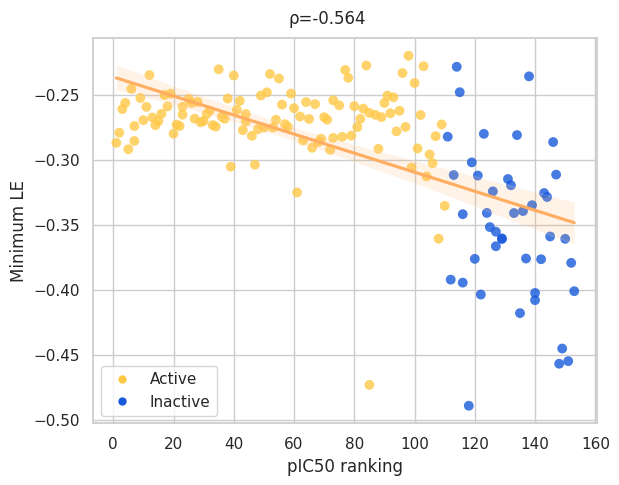

In [71]:
df['color_4'] = np.where(df['Activity_Label']=='Active', "#FFC947", "#185ADB")

corr = spearmanr(df['Rank_pIC50'], df['Consensus_min'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='Consensus_min', scatter_kws={'facecolors': df['color_4'], 'linewidth':0, 's':50}, line_kws = {'color': '#FFAD60'})
gl.text(58, -0.195, text, fontsize=12)

gl.set(ylabel='Minimum LE')
gl.set(xlabel='pIC50 ranking')
gl.figure.set_size_inches(6.5, 5)

custom = [Line2D([], [], marker='.', markersize=10, color='#FFC947', linestyle='None'),
          Line2D([], [], marker='.', markersize=10, color='#185ADB', linestyle='None')]
plt.legend(custom, ['Active', 'Inactive'], loc='lower left')

pIC50 ranking vs. median of scores:

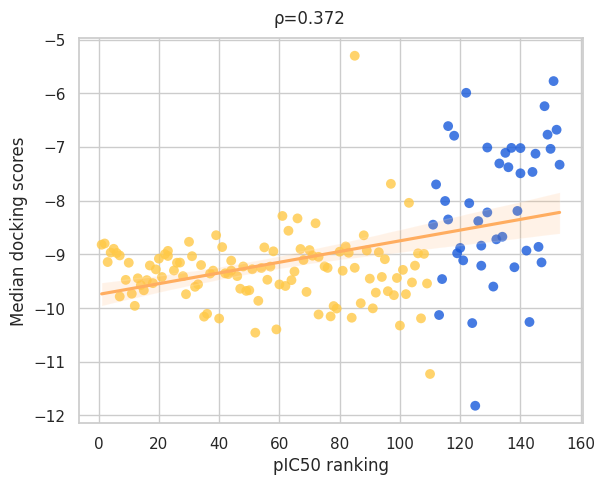

In [72]:
corr = spearmanr(df['Rank_pIC50'], df['Consensus_median_scores'])
corr = [np.round(c, 3) for c in corr]
text = 'ρ=%s' % (corr[0])

gl = sns.regplot(data=df, x='Rank_pIC50', y='Consensus_median_scores', scatter_kws={'facecolors': df['color_4'], 'linewidth':0, 's':50}, line_kws = {'color': '#FFAD60'})
gl.text(58, -4.7, text, fontsize=12)

gl.set(ylabel='Median docking scores')
gl.set(xlabel='pIC50 ranking')
gl.figure.set_size_inches(6.5, 5)

# Normal distribution test

In [73]:
#perform Kolmogorov-Smirnov test "normality test"
print("ledock")
kstest(df["Scores_Ledock"], 'norm')

ledock


KstestResult(statistic=0.9999982579541097, pvalue=0.0, statistic_location=-4.64, statistic_sign=1)

In [74]:
#perform Kolmogorov-Smirnov test "normality test"
print("autodock vina")
kstest(df["Scores_Vina"], 'norm')

autodock vina


KstestResult(statistic=0.9999999999827548, pvalue=0.0, statistic_location=-6.626, statistic_sign=1)

In [75]:
#perform Kolmogorov-Smirnov test "normality test"
print("score_moe")
kstest(df["Scores_MOE"], 'norm')

score_moe


KstestResult(statistic=0.9999999421739951, pvalue=0.0, statistic_location=-5.3002377, statistic_sign=1)

In [76]:
#perform Kolmogorov-Smirnov test "normality test"
print("pIC50")
kstest(df["pIC50"], 'norm')

pIC50


KstestResult(statistic=0.9974120694087637, pvalue=0.0, statistic_location=2.795880017, statistic_sign=-1)

In [ ]:
#Kolmogorov-Smirnov test "normality test"
#The scores of the 3 programs and the pIC50 values don't adjust to a normal distribution because pvalue is < 0.05